# Assignment: Unsupervised Machine Learning \ Clustering

## Part 1: Partitional Clustering

In this assignment you will experience with partitional & mixture model clustering. The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

In [27]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score as ch_score
from scipy.spatial.distance import squareform
import scipy.spatial.distance as distance
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Read blood test results as an EMR from an Excel file

In [2]:
# Open the file
xlsx = pd.ExcelFile('EMR-Blood.xlsx')

# Get the first sheet as an object
sheet1 = xlsx.parse(0)

# Set the Key column as the index
sheet1.set_index("Key", inplace=True)

# Show first 10 rows
sheet1[:10]

,Na,K,ALT,AST,WBC,RBC,Hgb,Hct
Key,,,,,,,,
1,141,4.65,31.92,35.01,10.25,4.06,17.6,36.3
2,140,4.96,36.41,16.70,6.13,3.80,13.2,35.6
3,136,3.66,41.43,13.17,5.86,4.26,16.2,43.7
4,136,4.74,23.92,30.33,10.80,4.83,16.1,49.8
5,140,4.74,43.66,20.44,6.59,4.05,12.6,39.1
6,146,3.98,48.41,33.22,4.53,4.04,17.9,47.3
7,144,5.29,44.29,19.28,10.12,3.96,17.2,47.9
8,138,4.57,50.43,16.39,4.66,4.91,13.7,41.5
9,144,3.96,31.51,34.87,4.57,4.72,15.1,47.6


### Blood Test Abbreviations
- Na == Sodium
- K == Potassium
- ALT == Alanine transaminase
- AST == Aspartate transaminase
- WBC == White blood cells
- RBC == Red blood cells
- Hgb == Hemoglobin
- Hct == Hematocrit

### Use K-Means to create clusters according to variables of uniform distribution

In [3]:
# Retrieve the K, WBC and Hgb column values from the dataset to cluster
variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

# Run the K-Means algorithm, assuming the correct number of clusters is 5
r = 5
y_pred_KMeans1 = KMeans(n_clusters=5, random_state=r).fit_predict(EMR3d1)

### Make a 3D chart

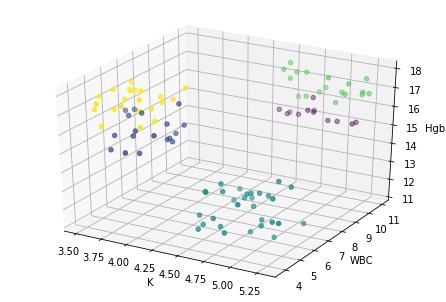

In [4]:
def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

## Challenge 211

Humans can clearly spot 3 clusters, however, for machines it's much harder to "learn" that. In the above implementation, K-Means was given the value of 5 as K.
Your mission, should you choose to accept it, is to develop a **generic** mechanism for finding the most reasonable number of clusters by:
1. Iterating K over a reasonable range, which should be derived from the number of points
2. Harnessing one of the segmentation algorithms we learned as a heuristic to choose K
3. Showing the final clusters in a 3D chart

398.97386857142857 579.7291234285713 98.0 142.39893529725902
133.08592666666664 845.6170653333332 48.5 308.16502312365714
107.84507666666667 870.8579153333333 32.0 258.4026471305768
85.89530818181817 892.8076838181817 23.75 246.86077667709208
69.1703215151515 909.5326704848484 18.8 247.20449219496012
54.62736851190475 924.0756234880952 15.5 262.197732642825


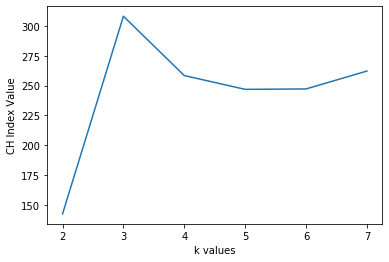

Elbow K = 3


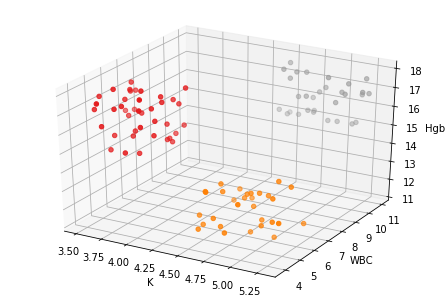

In [25]:
# Add your code for Challenge 211 after this line, and keep it in this cell.
import operator
def kmeans_challenge(X, columns):
    labels = {}
    index = {}
    floor = int(np.floor(np.log10(X.size)))+1
    total_ss = KMeans(n_clusters=1, random_state=r).fit(X).inertia_
    for k in range(2, 2**(floor)):
        clust = KMeans(n_clusters=k, random_state=r).fit(X)
        wcss = clust.inertia_
        bcss = total_ss - wcss
        labels[k] = clust.labels_
        norm = (X.shape[0]-k)/(k-1)
        ch_index = (bcss/wcss)*(norm)
        score = ch_score(X, labels[k]) 
        print(wcss, bcss, norm, ch_index)
        index[k] = ch_index

    elbow_k = max(index.items(), key=operator.itemgetter(1))[0]
    plt.plot(list(index.keys()), list(index.values()))
    plt.xlabel("k values");
    plt.ylabel("CH Index Value")
    plt.show()
    
    print(f'Elbow K = {elbow_k}')
    make_chart(X, labels[elbow_k], columns)
    return labels, KMeans(n_clusters=elbow_k, random_state=r).fit(X)

labels, clust = kmeans_challenge(EMR3d1, variables1);

### Silhouette analysis

Use graphic visualization of the Silhouette score to support your above answer:

For n_clusters = 2 The average silhouette_score is : 0.5738344190137955
For n_clusters = 3 The average silhouette_score is : 0.644343998493909
For n_clusters = 4 The average silhouette_score is : 0.5294291599903503
For n_clusters = 5 The average silhouette_score is : 0.47384384834383403
For n_clusters = 6 The average silhouette_score is : 0.4253772999021786
For n_clusters = 7 The average silhouette_score is : 0.42880676477890595
For n_clusters = 8 The average silhouette_score is : 0.4276691804728129
For n_clusters = 9 The average silhouette_score is : 0.4495434497575662
For n_clusters = 10 The average silhouette_score is : 0.41335641320147
For n_clusters = 11 The average silhouette_score is : 0.41047472304477284
For n_clusters = 12 The average silhouette_score is : 0.41666738732091785
For n_clusters = 13 The average silhouette_score is : 0.40173724120044996
For n_clusters = 14 The average silhouette_score is : 0.3927519751303865
For n_clusters = 15 The average silhouette_score is : 0.3

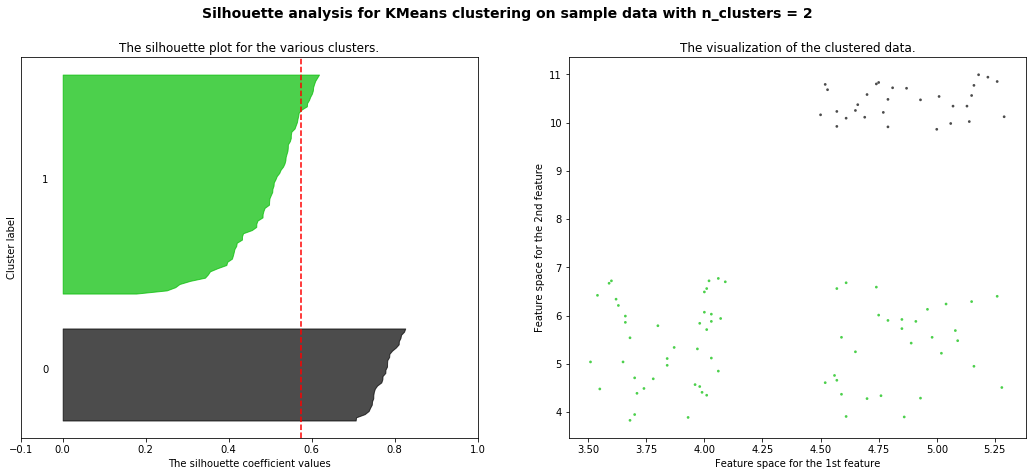

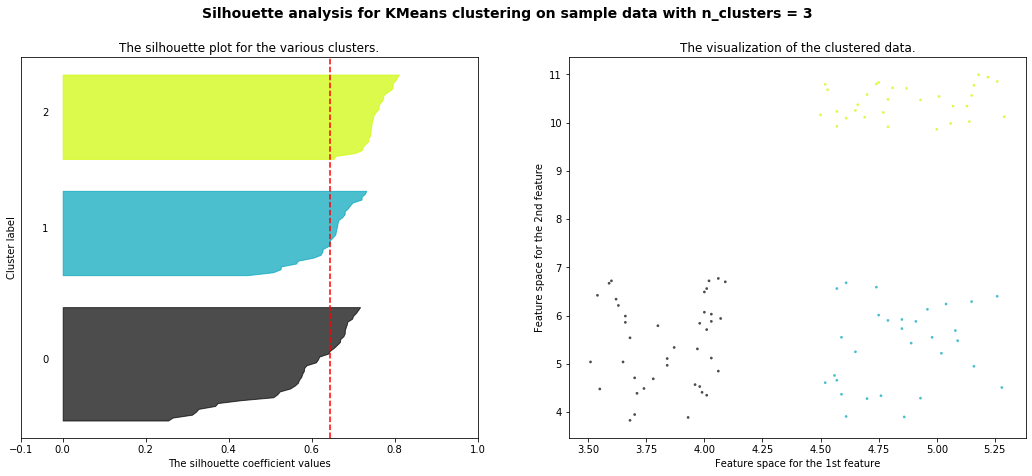

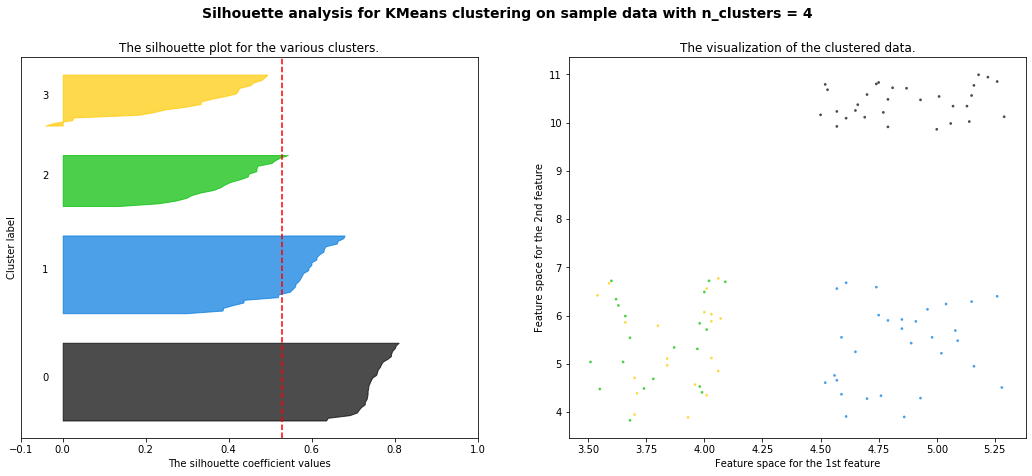

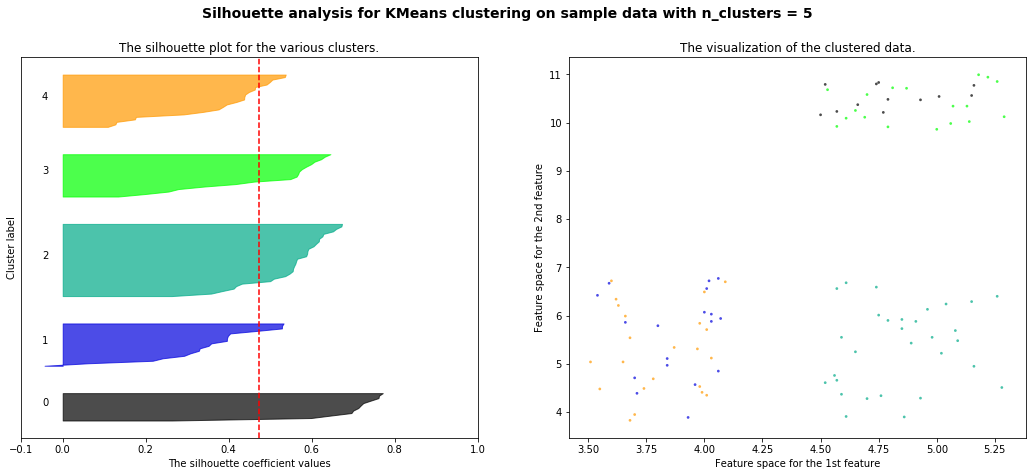

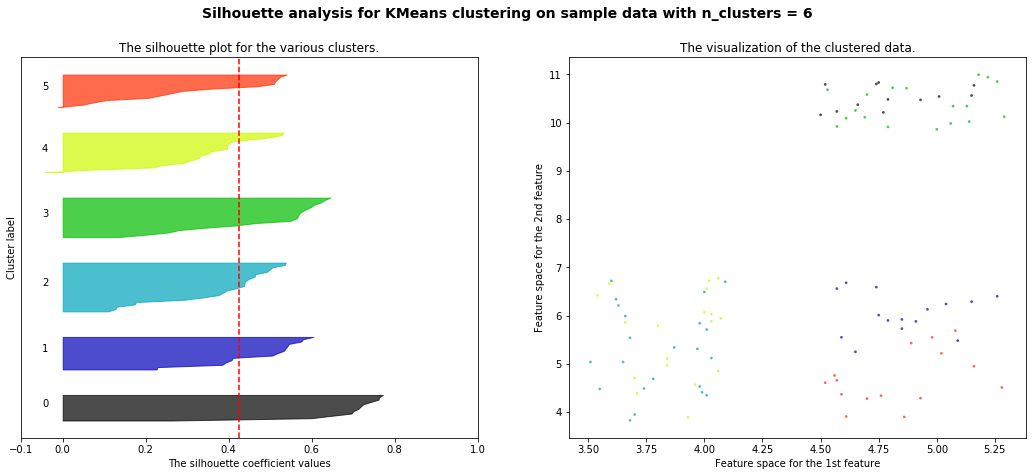

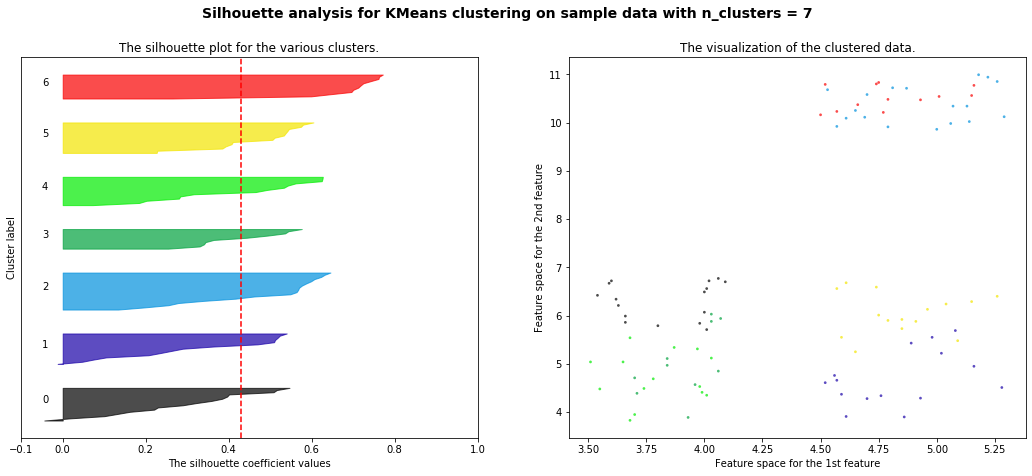

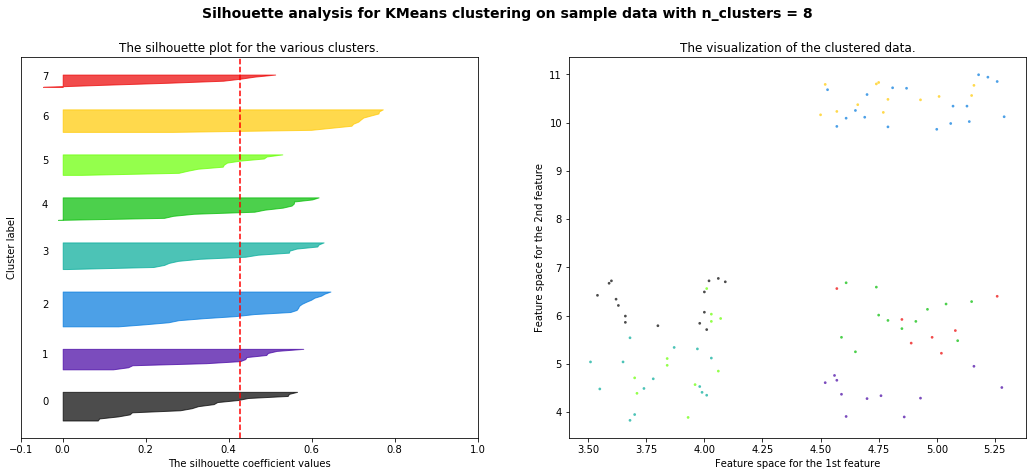

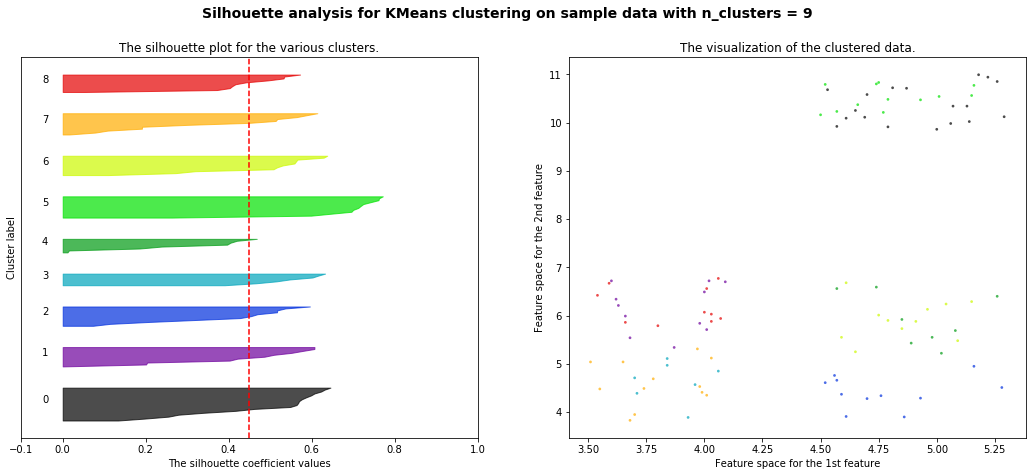

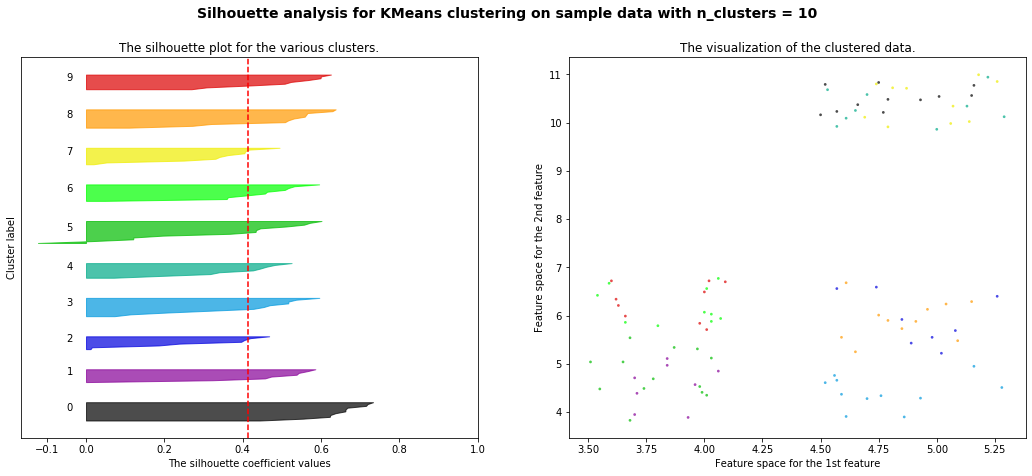

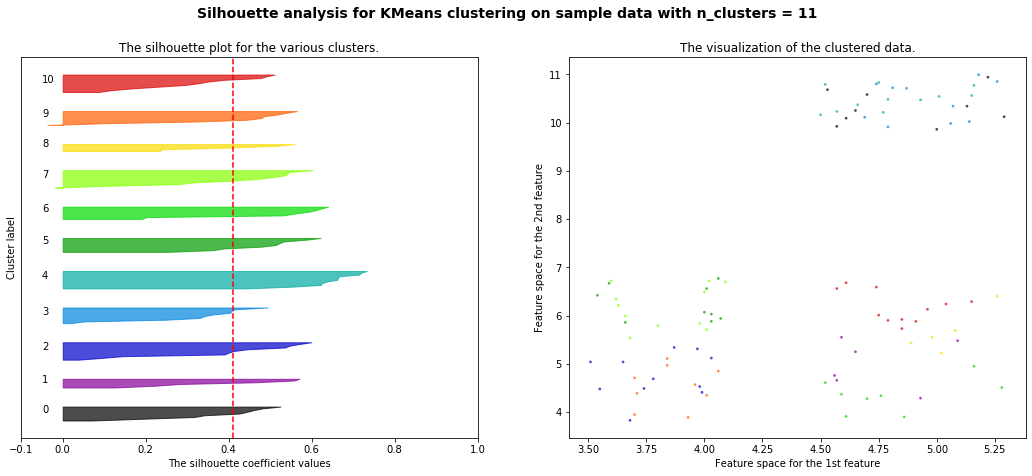

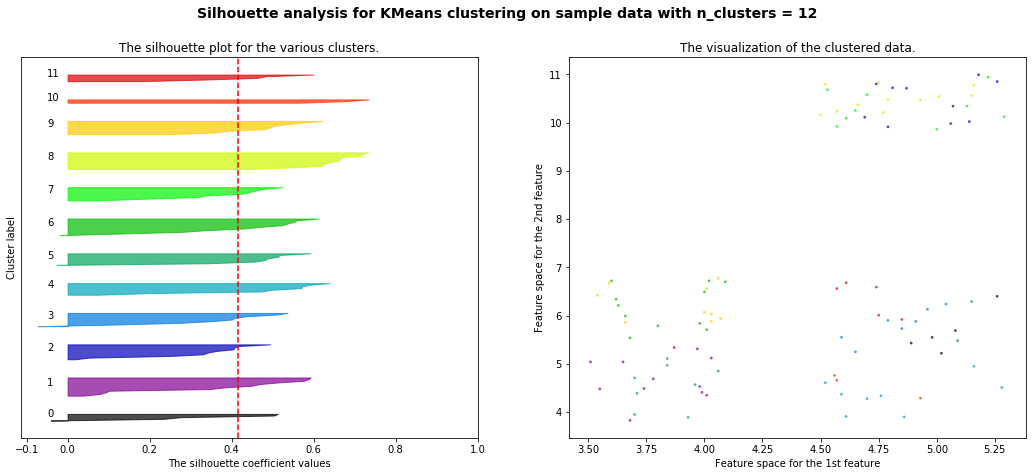

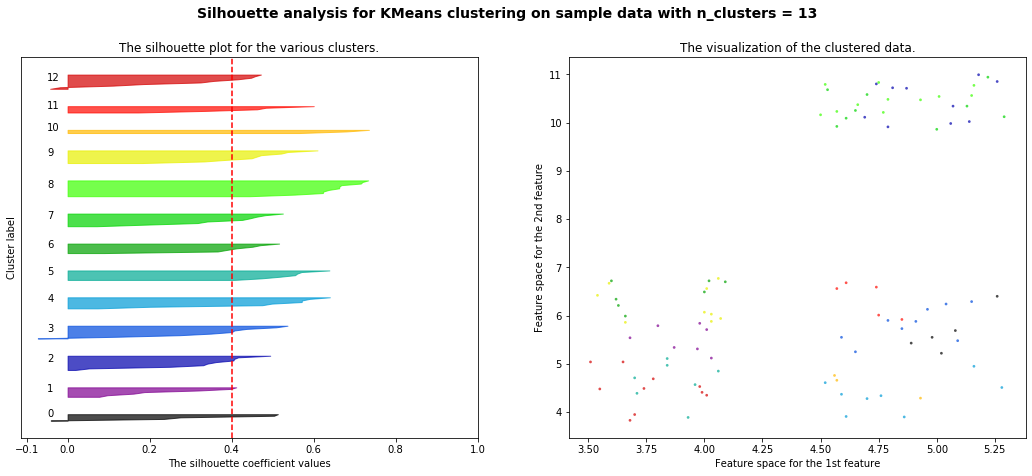

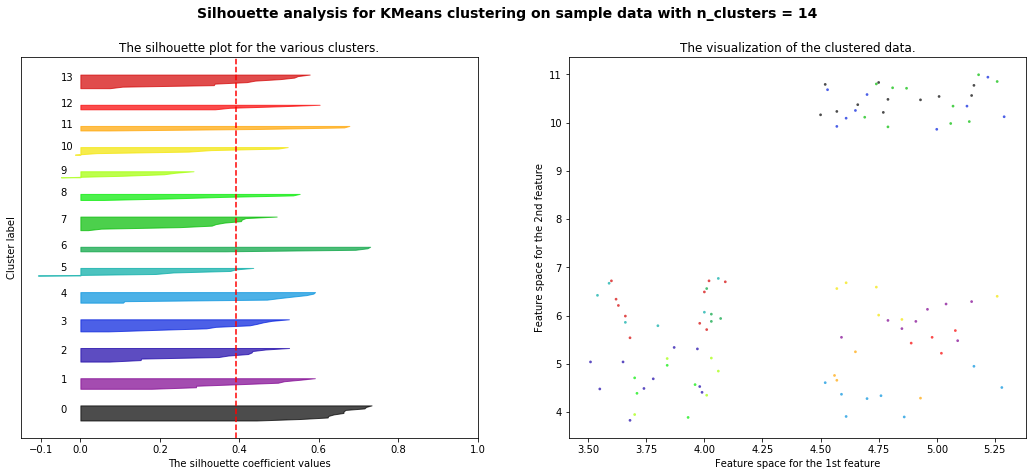

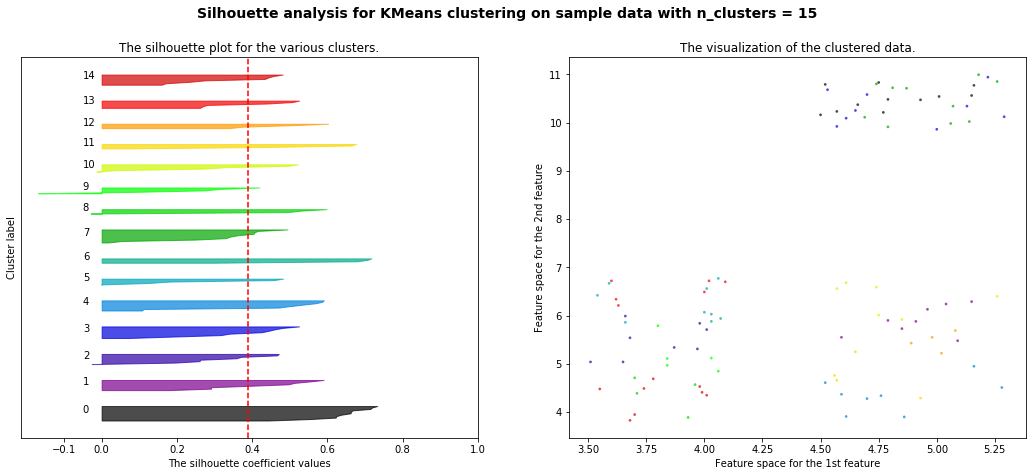

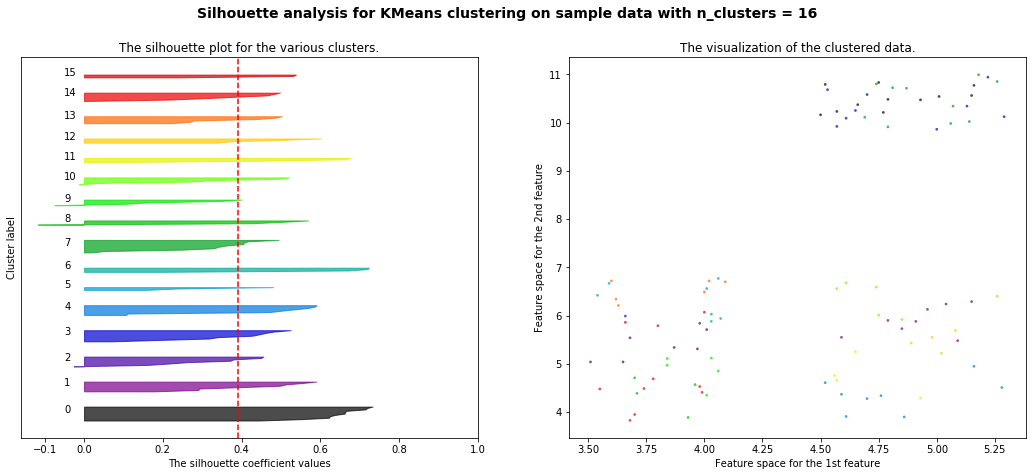

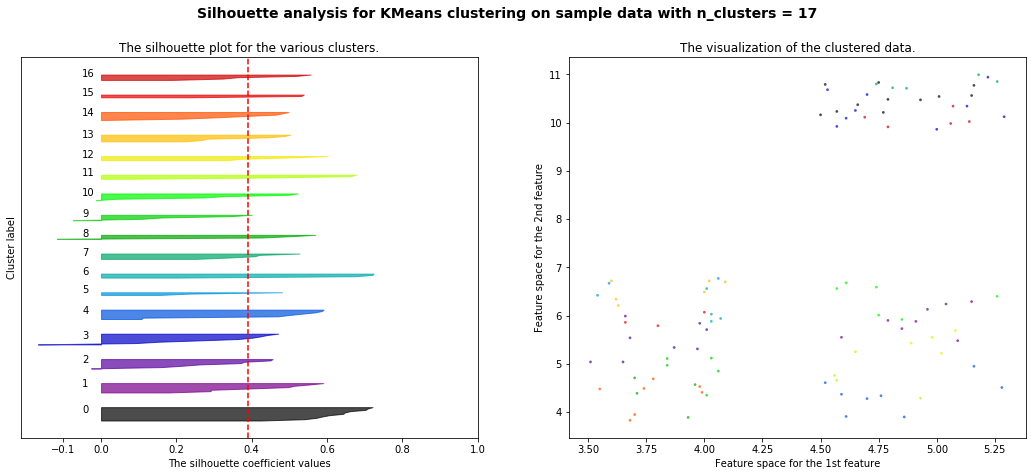

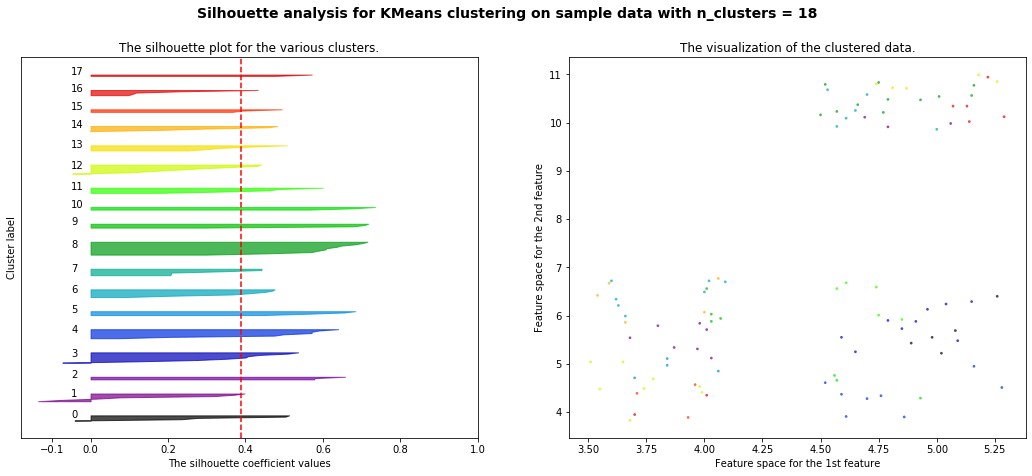

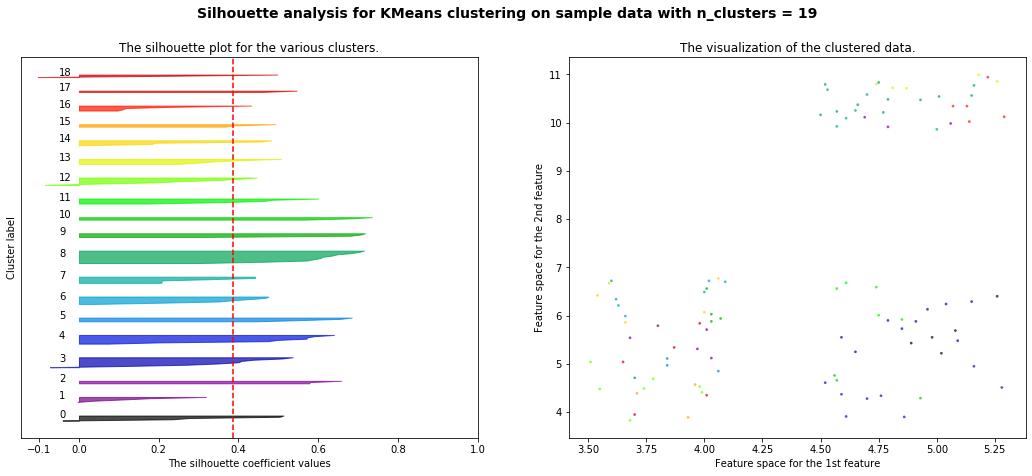

In [19]:
# Add your code for the Sillhouette graphic analysis
# You can use scikit-learn Sillhouette page as a reference

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def plot_Silhouette(X, y, num_clusters):
    # YOUR CODE HERE

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, y)
    print("For n_clusters =", num_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, y)

    y_lower = 10
    for i in range(num_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[y == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(y.astype(float) / num_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % num_clusters),
                 fontsize=14, fontweight='bold')

    plt.show;

for k, label in labels.items():
    plot_Silhouette(EMR3d1, label, k)

## Part 2: Mixture Models Clustering

### Use K-Means to create clusters according to variables of both uniform and Gaussian distributions

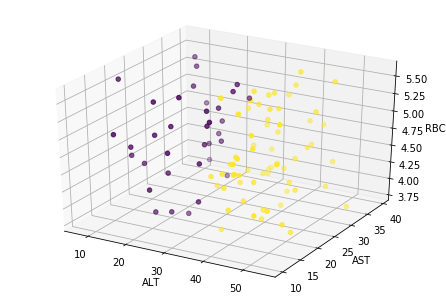

In [16]:
# Retrieve the ALT, AST and RBC column values from the dataset to cluster
variables2 = ["ALT","AST","RBC"]
EMR3d2 = sheet1.loc[:, variables2].values

# Run the K-Means algorithm, assuming the correct number of clusters is 2
y_pred_KMeans2 = KMeans(n_clusters=2, random_state=r).fit_predict(EMR3d2)

# Make a 3D chart
make_chart(EMR3d2, y_pred_KMeans2, variables2)

## Challenge 212
Scientists have found that in this population of patients, RBC distribution is uniform, ALT distribution is a Gaussian and AST distribution is a mixture of two Gaussians. Clearly, even by giving K-Means the correct K, the algorithm got to the wrong conclusion. This separation is "technically" correct, but lacks some underlying understanding of the natural phenomena. Your mission, should you choose to accept it, is to:
1. Apply the GMM algorithm on this data
2. Make any required (but reasonable) adjustments in order to find the true clusters
3. Show the final clusters in a 3D chart

9710.344064175824 7257.51741082417 98.0 73.24526315032645
5923.961547049442 11043.899927950552 48.5 90.41739083745125
4423.946166498599 12543.915308501395 32.0 90.73466872444858
3494.3457244113756 13473.515750588618 23.75 91.57536898567275
2594.985972785088 14372.875502214905 18.8 104.12775339653773
2158.162110172467 14809.699364827527 15.5 106.36380792380905


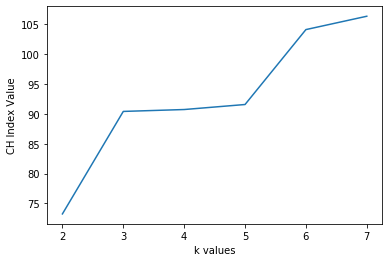

/Users/Adam/.pyenv/versions/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: invalid value encountered in sqrt
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Elbow K = 7


ValueError: operands could not be broadcast together with shapes (7,) (10,10) 

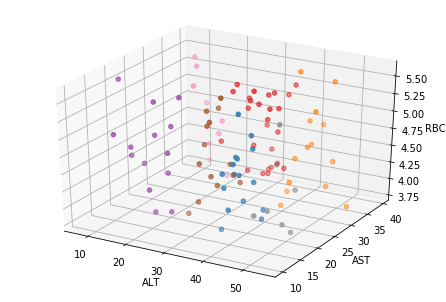

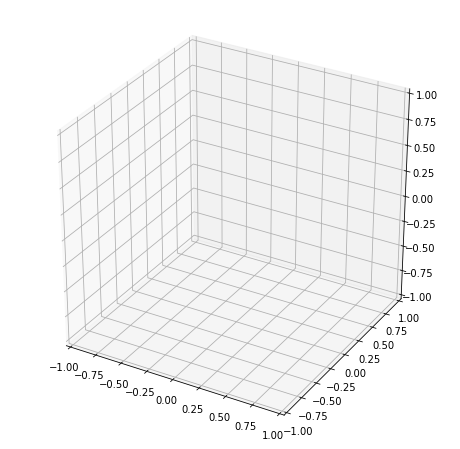

In [26]:
# Add your code for Challenge 212 after this line, and keep it in this cell.
from sklearn.mixture import GaussianMixture as GM
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl


color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

_, best_k = kmeans_challenge(EMR3d2, variables2)
init_means = best_k.cluster_centers_
k = init_means.shape[0]
weights = np.bincount(best_k.labels_)/len(best_k.labels_)
gm = GM(n_components=k, random_state=r, covariance_type='full', means_init=init_means, 
        weights_init=weights)

# Fit a Gaussian mixture with EM using five components
gmm = gm.fit(EMR3d2)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import os

def visualize_3d_gmm(points, w, mu, stdev, export=True):
    '''
    plots points and their corresponding gmm model in 3D
    Input: 
        points: N X 3, sampled points
        w: n_gaussians, gmm weights
        mu: 3 X n_gaussians, gmm means
        stdev: 3 X n_gaussians, gmm standard deviation (assuming diagonal covariance matrix)
    Output:
        None
    '''

    n_gaussians = mu.shape[1]
    N = int(np.round(points.shape[0] / n_gaussians))
    # Visualize data
    fig = plt.figure(figsize=(8, 8))
    axes = fig.add_subplot(111, projection='3d')
    axes.set_xlim([-1, 1])
    axes.set_ylim([-1, 1])
    axes.set_zlim([-1, 1])
    plt.set_cmap('Set1')
    colors = cmx.Set1(np.linspace(0, 1, n_gaussians))
    for i in range(n_gaussians):
        idx = range(i * N, (i + 1) * N)
        axes.scatter(points[idx, 0], points[idx, 1], points[idx, 2], alpha=0.3, c=colors[i])
        plot_sphere(w=w[i], c=mu[:, i], r=stdev[:, i], ax=axes)

    plt.title('3D GMM')
    axes.set_xlabel('X')
    axes.set_ylabel('Y')
    axes.set_zlabel('Z')
    axes.view_init(35.246, 45)
    if export:
        if not os.path.exists('images/'): os.mkdir('images/')
        plt.savefig('images/3D_GMM_demonstration.png', dpi=100, format='png')
    plt.show()
    
def plot_sphere(w=0, c=[0,0,0], r=[1, 1, 1], subdev=10, ax=None, sigma_multiplier=3):
    '''
        plot a sphere surface
        Input: 
            c: 3 elements list, sphere center
            r: 3 element list, sphere original scale in each axis ( allowing to draw elipsoids)
            subdiv: scalar, number of subdivisions (subdivision^2 points sampled on the surface)
            ax: optional pyplot axis object to plot the sphere in.
            sigma_multiplier: sphere additional scale (choosing an std value when plotting gaussians)
        Output:
            ax: pyplot axis object
    '''

    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    pi = np.pi
    cos = np.cos
    sin = np.sin
    phi, theta = np.mgrid[0.0:pi:complex(0,subdev), 0.0:2.0 * pi:complex(0,subdev)]
    x = sigma_multiplier*r[0] * sin(phi) * cos(theta) + c[0]
    y = sigma_multiplier*r[1] * sin(phi) * sin(theta) + c[1]
    z = sigma_multiplier*r[2] * cos(phi) + c[2]
    cmap = cmx.ScalarMappable()
    cmap.set_cmap('jet')
    c = cmap.to_rgba(w)

    ax.plot_surface(x, y, z, color=c, alpha=0.2, linewidth=1)

    return ax

visualize_3d_gmm(EMR3d2, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T)




# Good Luck and Enjoy Learning Machine Learning!

